A 1D regression with decision tree.

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the `max_depth` parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.



In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


### Max depth of a Tree is 2

In [12]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Max depth of a Tree is 5

In [25]:
# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [27]:
Train_score = regr_1.score(X,y)
Train_score

0.7629899797432984

In [28]:
Test_score = regr_1.score(X_test,y_1)
Test_score

1.0

ValueError: x and y must be the same size

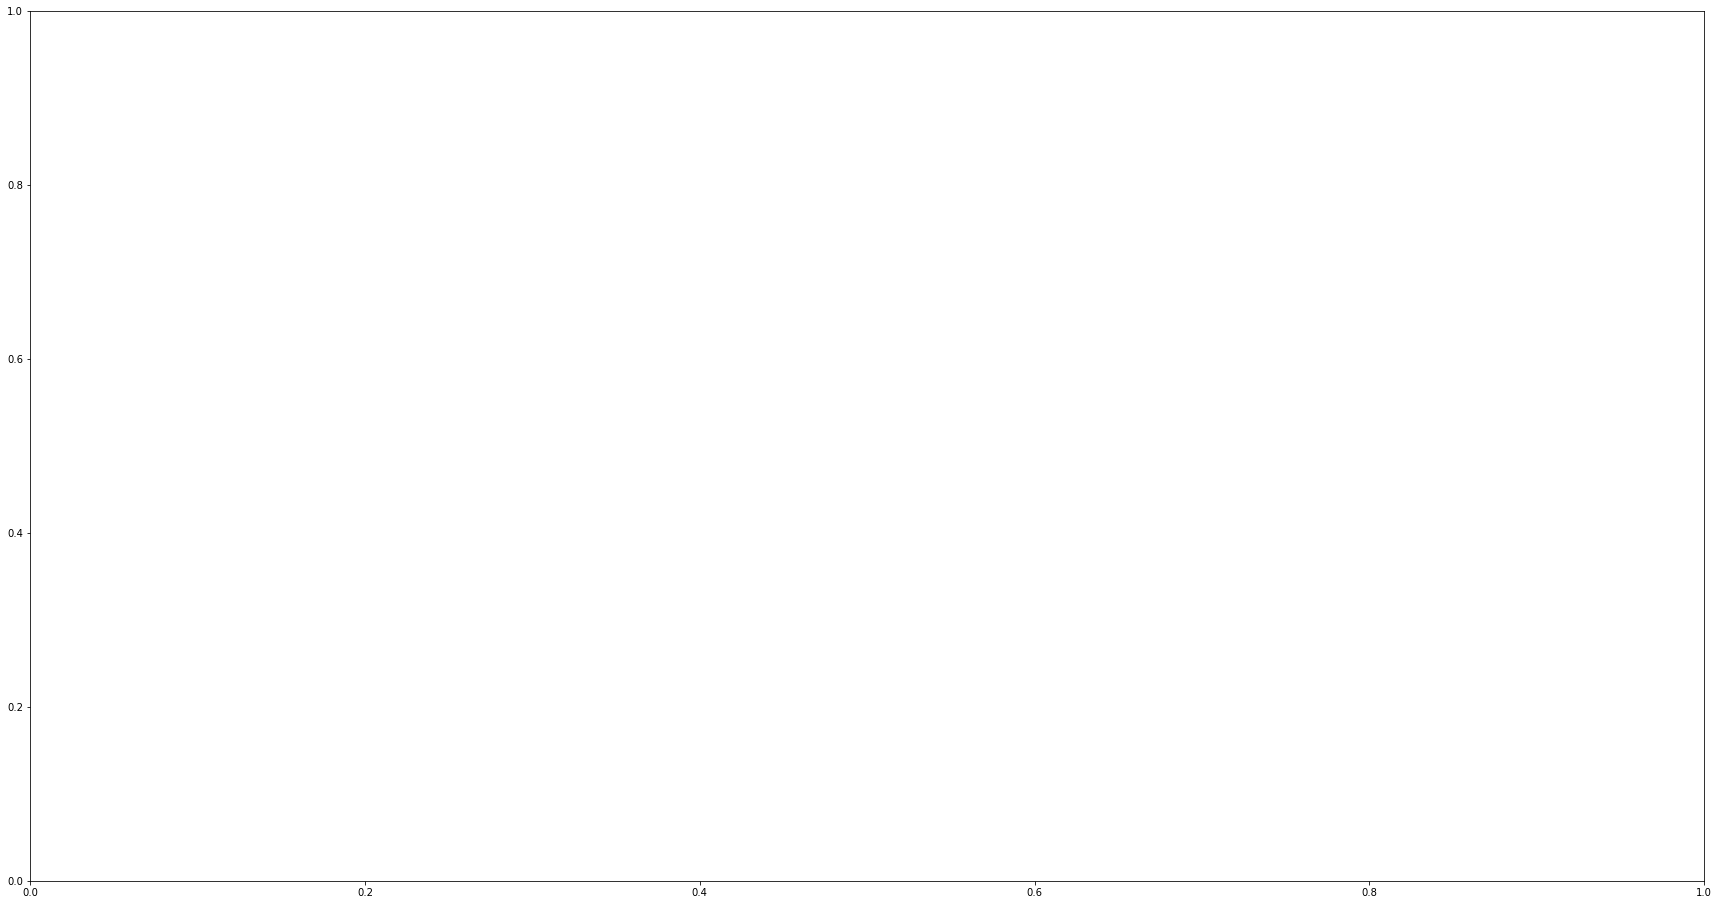

In [6]:
# Plot the results
plt.figure(figsize=(30,16))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=6)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.savefig("Decision Tree Regression.png",dip=150)
plt.show()

### Multi-output Decision Tree Regression


An example to illustrate multi-output regression with decision tree.

The decision trees is used to predict simultaneously the noisy x and y observations of a circle given a single underlying feature. As a result, it learns local linear regressions approximating the circle.

We can see that if the maximum depth of the tree (controlled by the `max_depth` parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.



In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y[::5, :] += (0.5 - rng.rand(20, 2))

In [3]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=8)

In [4]:
# Predict
X_test = np.arange(-100.0, 100.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

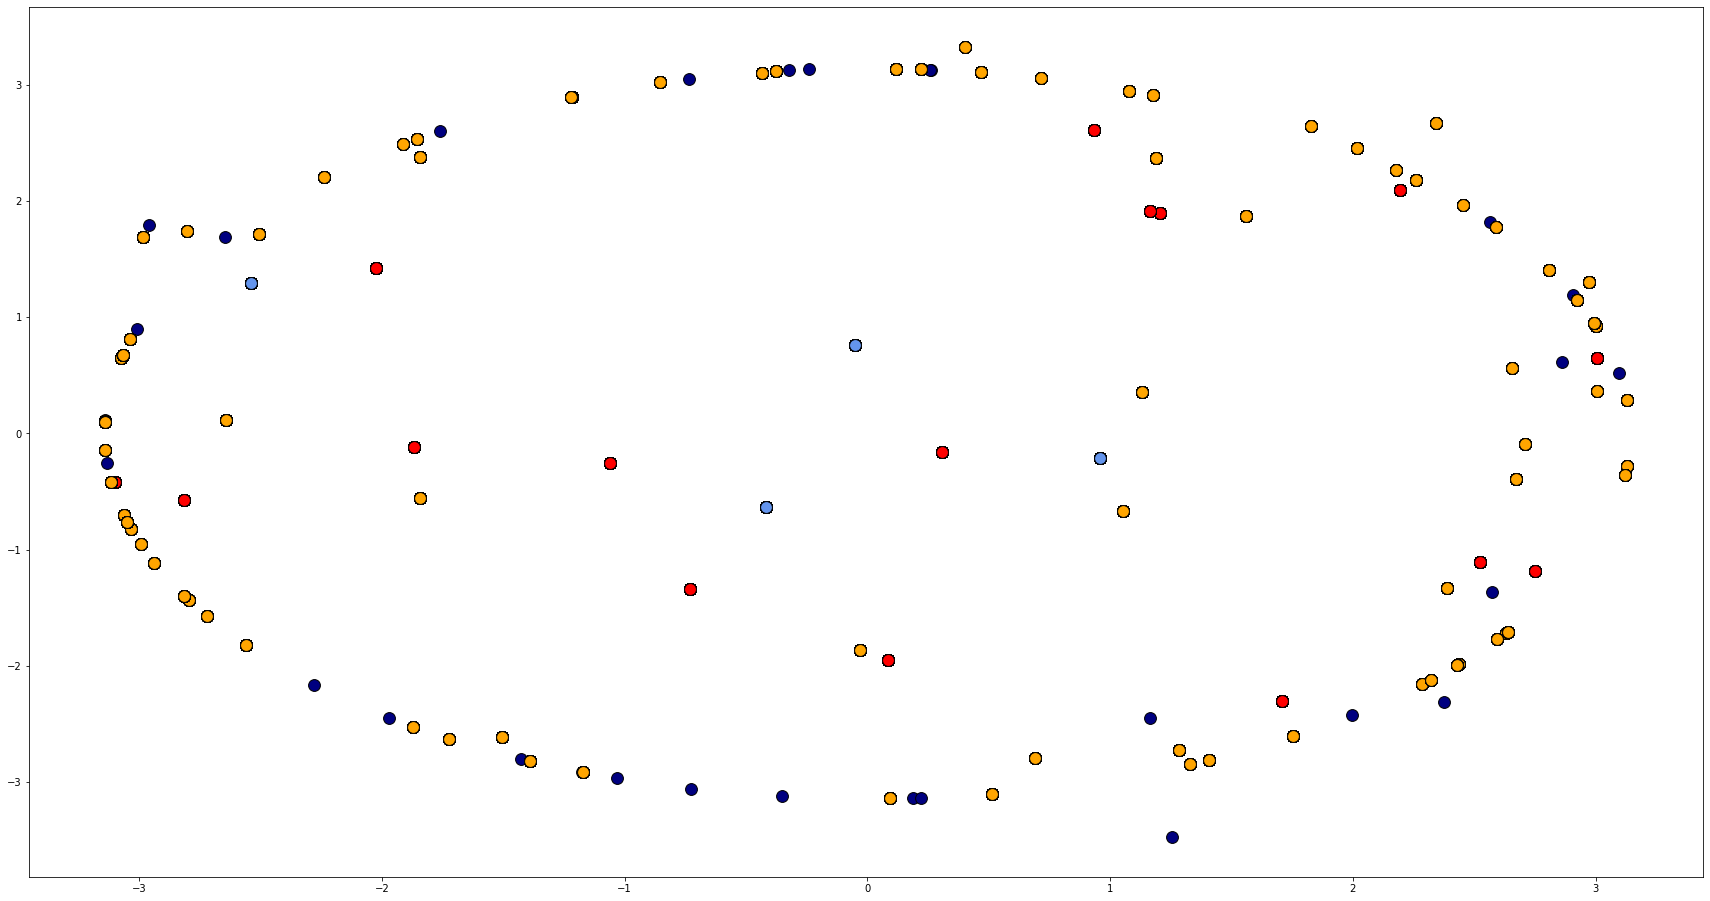

In [5]:
# Plot the results
plt.figure(figsize=(30,16))
s = 140
plt.scatter(y[:, 0],
            y[:, 1],
            c="navy", 
            s=s,
            edgecolor="black", 
            label="data")
plt.scatter(y_1[:, 0],
            y_1[:, 1],
            c="cornflowerblue", 
            s=s,
            edgecolor="black", 
            label="max_depth=2")
plt.scatter(y_2[:, 0],
            y_2[:, 1],
            c="red", 
            s=s,
            edgecolor="black", 
            label="max_depth=5")
plt.scatter(y_3[:, 0], 
            y_3[:, 1], 
            c="orange", 
            s=s,
            edgecolor="black", 
            label="max_depth=8")